<a href="https://colab.research.google.com/github/Tien84/Face_Detection/blob/master/demoSARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 15.1 MB/s 
     |████████████████████████████████| 9.8 MB 34.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
!pip install pyramid

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 246 kB 9.8 MB/s 
     |████████████████████████████████| 114 kB 37.1 MB/s 
     |████████████████████████████████| 251 kB 38.2 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/driver')

Mounted at /content/driver


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time
from statsmodels.tsa.seasonal import seasonal_decompose



In [ ]:
def parser(s):
  return datetime.strptime(s, '%Y-%m-%d')

In [ ]:
#df = pd.read_csv('/content/driver/My Drive/LSTM_Model/AAPL.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
#df = pd.read_csv('/content/driver/My Drive/LSTM_Model/AAPL.csv', parse_dates=[0], squeeze=True, date_parser=parser)
df = pd.read_csv('/content/driver/My Drive/LSTM_Model/DataBitcoin.csv', parse_dates=['Date'], index_col='Date')
#df.tail(2558)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-08-10,265.477997,267.032013,262.596008,264.470001,264.470001,20979400
2015-08-11,264.342010,270.385986,264.093994,270.385986,270.385986,25433900
2015-08-12,270.597992,270.673004,265.468994,266.376007,266.376007,26815400
2015-08-13,266.183014,266.231995,262.841003,264.079987,264.079987,27685500
2015-08-14,264.131989,267.466003,261.477997,265.679993,265.679993,27091200
...,...,...,...,...,...,...
2022-08-06,23291.423828,23326.562500,22961.279297,22961.279297,22961.279297,15978259885
2022-08-07,22963.505859,23359.009766,22894.556641,23175.890625,23175.890625,15886817043
2022-08-08,23179.527344,24203.689453,23176.546875,23809.486328,23809.486328,28575544847


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2558 entries, 2015-08-10 to 2022-08-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2558 non-null   float64
 1   High       2558 non-null   float64
 2   Low        2558 non-null   float64
 3   Close      2558 non-null   float64
 4   Adj Close  2558 non-null   float64
 5   Volume     2558 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 139.9 KB


In [ ]:
#infer the frequency of the data
df = df.asfreq(pd.infer_freq(df.index))
df=df.dropna()
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-08-10,265.477997,267.032013,262.596008,264.470001,264.470001,20979400
2015-08-11,264.342010,270.385986,264.093994,270.385986,270.385986,25433900
2015-08-12,270.597992,270.673004,265.468994,266.376007,266.376007,26815400
2015-08-13,266.183014,266.231995,262.841003,264.079987,264.079987,27685500
2015-08-14,264.131989,267.466003,261.477997,265.679993,265.679993,27091200
...,...,...,...,...,...,...
2022-08-06,23291.423828,23326.562500,22961.279297,22961.279297,22961.279297,15978259885
2022-08-07,22963.505859,23359.009766,22894.556641,23175.890625,23175.890625,15886817043
2022-08-08,23179.527344,24203.689453,23176.546875,23809.486328,23809.486328,28575544847


In [ ]:
start_date = datetime(2015,8,10)
end_date = datetime(2022,8,10)
lim_df = df[start_date:end_date]['Adj Close']
lim_df

Date
2015-08-10      264.470001
2015-08-11      270.385986
2015-08-12      266.376007
2015-08-13      264.079987
2015-08-14      265.679993
                  ...     
2022-08-06    22961.279297
2022-08-07    23175.890625
2022-08-08    23809.486328
2022-08-09    23164.318359
2022-08-10    23037.019531
Freq: D, Name: Adj Close, Length: 2558, dtype: float64

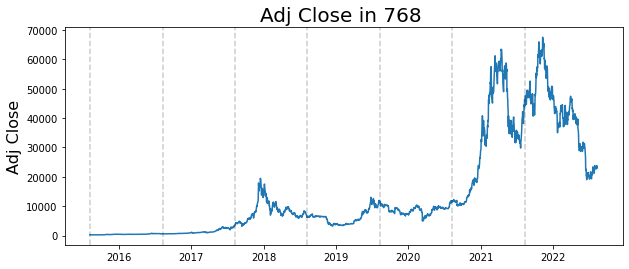

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(lim_df)
plt.title('Adj Close in 768 ', fontsize=20)
plt.ylabel('Adj Close', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-08-10'), color='k', linestyle='--', alpha=0.2)
plt.show()

In [ ]:
#first_diff = lim_df.diff()[1:]
first_diff = lim_df.diff()

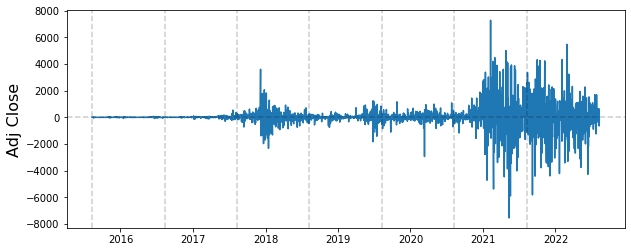

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(first_diff)
#plt.title('Adj Close in 768 ', fontsize=20)
plt.ylabel('Adj Close', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-08-10'), color='k', linestyle='--', alpha=0.2)
plt.axhline(0, color='k', linestyle='--', alpha=0.2)

In [ ]:
import numpy as np

# Get training and testing sets
train_end = datetime(2015,8,10)
test_end = datetime(2022,8,10)

train_data = list(df[:train_end]['Adj Close'])
test_data = df[train_end + timedelta(days=1):test_end]['Adj Close']


#test_data = df[train_end + timedelta(days=1):test_end]['Adj Close']

#train_data = lim_df[:train_end]['Adj Close']
#test_data = lim_df[train_end + timedelta(days=1):test_end]['Adj Close']

#train_data = list(lim_df[:train_end]['Adj Close'])
#test_data = list(lim_df[train_end + timedelta(days=1):test_end]['Adj Close'])
train_data = lim_df[:train_end]
test_data = lim_df[train_end + timedelta(days=1):test_end]


#train_data = list(lim_df[:1790]['Adj Close'])
#test_data = list(lim_df[1790:]['Adj Close'])

#test_data = list(df[train_end:test_end]['Adj Close'])

#train_data = df[df.index < '2017-05-05'], df[df.index >= '2012-01-03']
#test_data = df[df.index < '2020-01-09'], df[df.index >= '2017-05-05']

#train_data, test_data = lim_df[lim_df.index < '2012-01-03'], lim_df[lim_df.index >= '2020-01-09']
print('train shape: ', train_data.shape)
print('test shape: ', test_data.shape)
print (len(train_data))
print(len(test_data))



train shape:  (1,)
test shape:  (2557,)
1
2557


In [ ]:
#ACF plot and PACF plot with 99% Confidence Intervals
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
#n_test_ob = len(test_data)
#n_test_ob
#plot_acf(df['Adj Close'], lags=20, alpha=0.01)
#plot_acf(test_data, lags= 16, alpha=0.01)
#plot_acf(lim_df[train_end + timedelta(days=1):test_end]['Adj Close'])
#plot_pacf(lim_df[train_end + timedelta(days=1):test_end]['Adj Close'])


/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


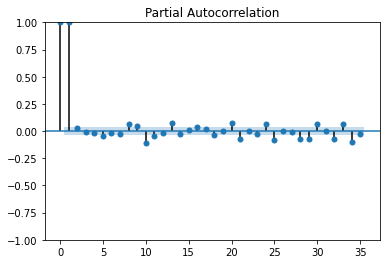

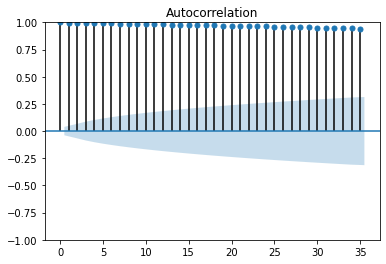

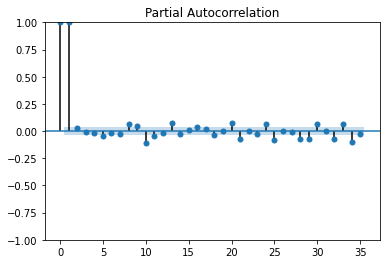

In [ ]:
#ACF plot and PACF plot with 95% Confidence Intervals
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
#Differencing
data_df = df.diff()
data_df = data_df.dropna()
data_df
#plot_acf(df['Adj Close'], lags=20, alpha=0.05)
#plot_acf(test_data, lags=20, alpha=0.05)
#plot_pacf(test_data, lags=20, alpha=0.05)
plot_acf(test_data)
plot_pacf(test_data)

In [ ]:
#ACF values and PACF values
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
#print(acf(df['Adj Close']))
print(acf(test_data))
print(pacf(test_data))

[1.         0.99853673 0.99713682 0.99571833 0.99425927 0.99271394
 0.99113057 0.98949151 0.98798363 0.98656547 0.98491589 0.98319562
 0.98145229 0.97987551 0.97822122 0.97658899 0.97501334 0.97350994
 0.97195916 0.97042306 0.96900373 0.96741372 0.96588724 0.96430323
 0.96284368 0.96122179 0.95964032 0.95799631 0.95622006 0.9543293
 0.95256461 0.95075168 0.94876524 0.94697467 0.94492414]
[ 1.          0.99892739  0.02864972 -0.00871157 -0.02035895 -0.04236254
 -0.0209353  -0.02722903  0.06089378  0.04804419 -0.10582381 -0.04239109
 -0.01804315  0.07814427 -0.02672717  0.01443843  0.03720264  0.02116271
 -0.03800813  0.00430841  0.07200391 -0.07562402  0.00457537 -0.02286459
  0.06393002 -0.0785282  -0.00375923 -0.00990175 -0.06831184 -0.07401874
  0.06638355  0.0044072  -0.07584315  0.06380575 -0.10286111]


/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


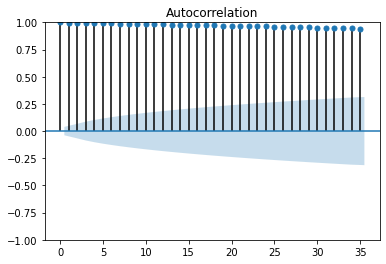

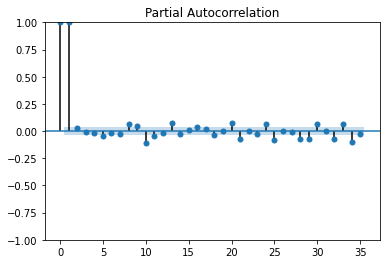

In [ ]:
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
#Seasonal differencing
data_df = df.diff(12)
data_df = data_df.dropna()

#plot ACF
#plot_acf(data_df['Adj Close'], lags= 30)
#plot_acf(data_df['Adj Close'])
plot_acf(test_data)
#plot PACF
#plot_pacf(data_df['Adj Close'], lags=30)
#plot_pacf(data_df['Adj Close'])
plot_pacf(test_data)
plt.show()

In [ ]:
#from pyramid.arima import auto_arima
from pmdarima.arima import auto_arima
model_sarima = auto_arima(test_data, start_p=3, start_q=3,
                           max_p=5, max_q=5, m=24,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

print(model_sarima.aic())

In [ ]:
model_sarima.summary()

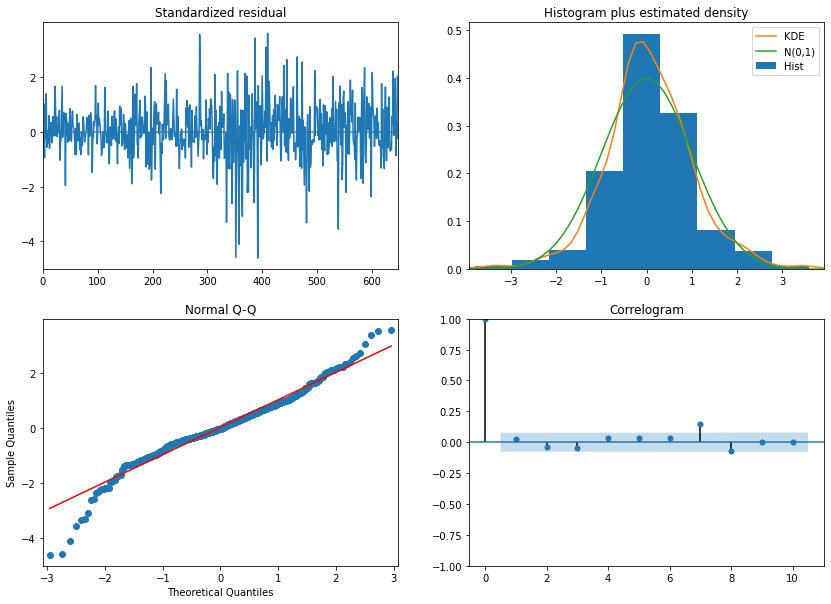

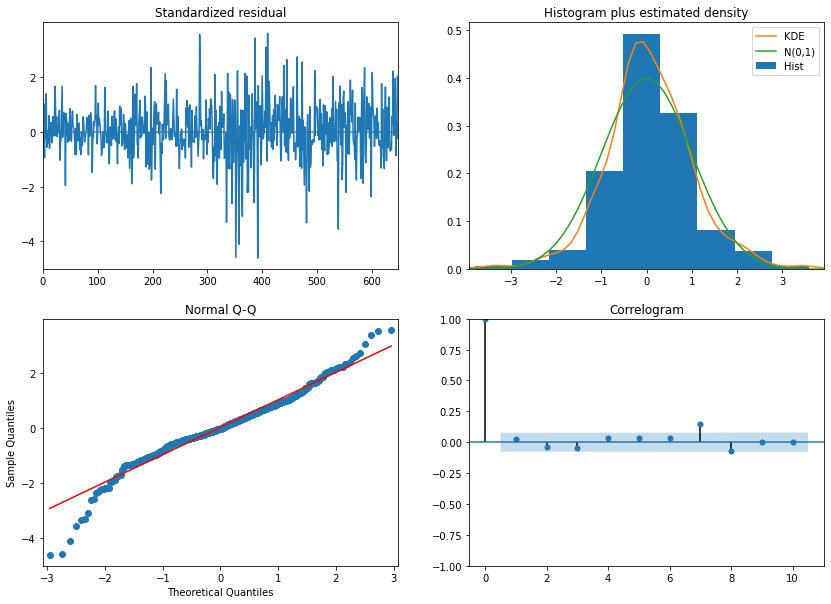

In [ ]:
model_sarima.plot_diagnostics(figsize=(14,10))

In [ ]:
import statsmodels.api as sm
import warnings
import itertools

# define model
#model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)
model = sm.tsa.statespace.SARIMAX(test_data, order=(3,1,3),
                                  seasonal_order=(3,1,3,12),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)
results = model.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                                     SARIMAX Results                                      
Dep. Variable:                          Adj Close   No. Observations:                 2557
Model:             SARIMAX(3, 1, 3)x(3, 1, 3, 12)   Log Likelihood              -20753.154
Date:                            Sun, 14 Aug 2022   AIC                          41532.307
Time:                                    14:02:22   BIC                          41608.041
Sample:                                08-11-2015   HQIC                         41559.800
                                     - 08-10-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6141      1.670      0.368      0.713      -2.659       3.887
ar.L2          0.0978      2.299   

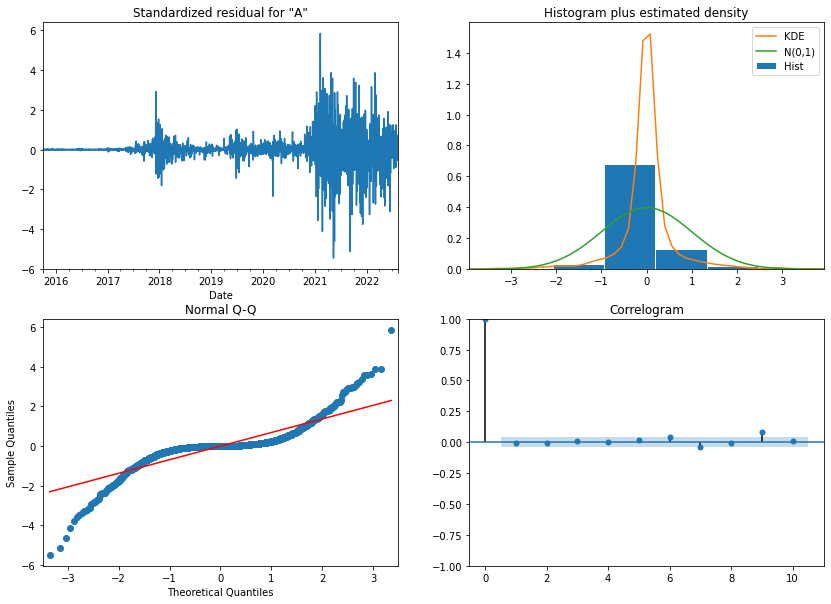

In [ ]:
results.plot_diagnostics(figsize=(14,10))
plt.show()

In [ ]:
import statsmodels.api as sm
import warnings
import itertools

# define model
#model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)
model = sm.tsa.statespace.SARIMAX(test_data, order=(3,1,3),
                                  seasonal_order=(3,1,3,24),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)
results = model.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                                     SARIMAX Results                                      
Dep. Variable:                          Adj Close   No. Observations:                 2557
Model:             SARIMAX(3, 1, 3)x(3, 1, 3, 24)   Log Likelihood              -20295.126
Date:                            Sun, 14 Aug 2022   AIC                          40616.252
Time:                                    14:19:14   BIC                          40691.733
Sample:                                08-11-2015   HQIC                         40643.680
                                     - 08-10-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4985      2.021      0.247      0.805      -3.462       4.459
ar.L2         -0.5584      1.847   

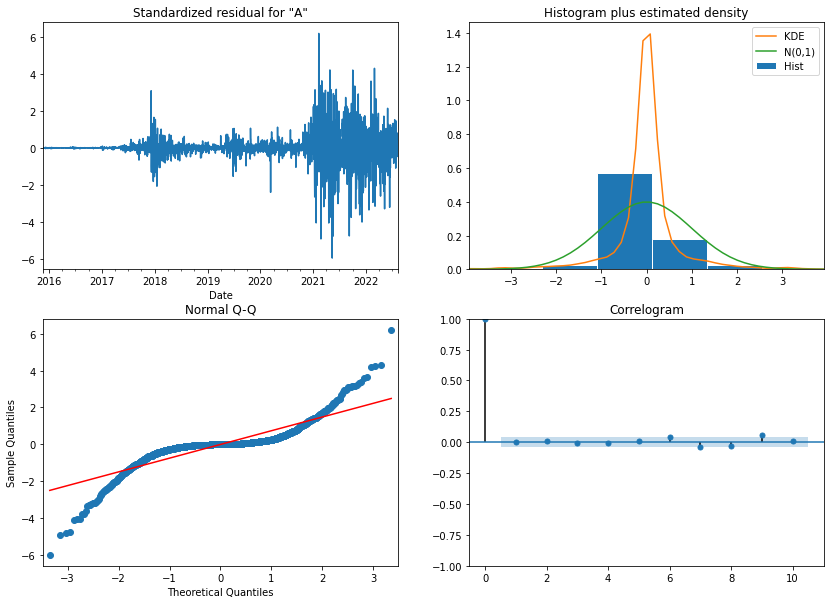

In [ ]:
results.plot_diagnostics(figsize=(14,10))
plt.show()

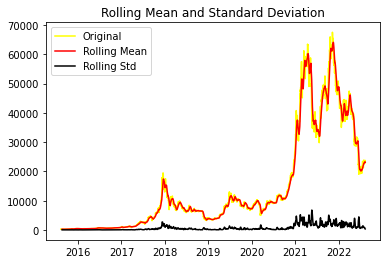

Results of fuller test
Test Statistics                  -1.533679
p-value                           0.516790
No. of lags used                 27.000000
Number of observations used    2530.000000
critical value (1%)              -3.432937
critical value (5%)              -2.862683
critical value (10%)             -2.567379
dtype: float64


In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    
    #Plot rolling statistics:
    plt.plot(timeseries, color='yellow',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

test_stationarity(df['Adj Close'])

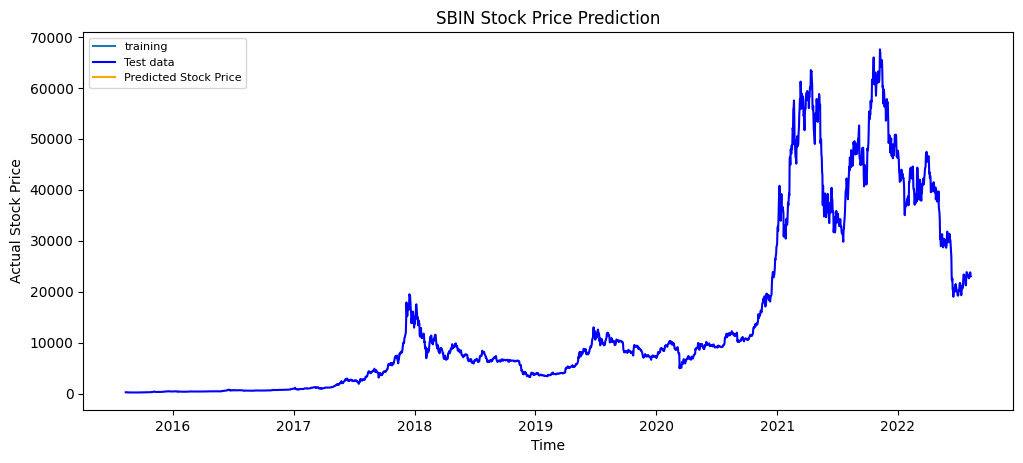

In [ ]:
# Forecast
#fc, se, conf = results.forecast(519, alpha=0.05)  # 95% confidence
#fc = results.forecast(768, alpha=0.05)
fc = results.forecast(len(test_data))
conf = results.forecast(len(test_data))

fc_series = pd.Series(fc, index=test_data.index)
#fc_series = pd.Series(fc,lim_df[train_end:], df['Adj Close'])

lower_series = pd.Series(lim_df[: train_end], df['Adj Close'])
upper_series = pd.Series(lim_df[train_end:], df['Adj Close'])

#lower_series = pd.Series(conf[:, 0], index=test_data.index)
#upper_series = pd.Series(conf[:, 1], index=test_data.index)


#lower_series = pd.Series(lim_df[: train_end], index=test_data.index)
#upper_series = pd.Series(lim_df[train_end:], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Test data')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('SBIN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()


In [ ]:
print(len(test_data))
test_data

2557


Date
2015-08-11      270.385986
2015-08-12      266.376007
2015-08-13      264.079987
2015-08-14      265.679993
2015-08-15      261.550995
                  ...     
2022-08-06    22961.279297
2022-08-07    23175.890625
2022-08-08    23809.486328
2022-08-09    23164.318359
2022-08-10    23037.019531
Freq: D, Name: Adj Close, Length: 2557, dtype: float64

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Get the predictions and residuals
pred = results.forecast(len(test_data))
#pred = results.forecast(768)
#predictions = model_sarima.predict(len(test_data))
print(pred)

#pred = pd.Series(predictions, index=test_data.index)
#predictions = pd.Series(pred, index=df[train_end + timedelta(days=1):test_end]['Adj Close'].index)
#predictions = pd.Series(pred.values, index=df[train_end + timedelta(days=1):test_end].index)
#predictions = pd.Series(pred.values, index=df[train_end + timedelta(days=1):test_end]['Adj Close'].index)
#predictions = pd.Series(pred, index=df[train_end + timedelta(days=1):test_end]['Adj Close'].index)
#predictions
#predictions = pd.Series(pred, index=df[1790:]['Adj Close'].index)
#predictions
#residuals = test_data - predictions
#residuals =  predictions - test_data
#residuals


2022-08-11    23219.684759
2022-08-12    23433.763867
2022-08-13    23435.184573
2022-08-14    23410.378331
2022-08-15    23618.814187
                  ...     
2029-08-06    27774.900114
2029-08-07    27754.684042
2029-08-08    27785.259128
2029-08-09    27552.004807
2029-08-10    27979.576109
Freq: D, Name: predicted_mean, Length: 2557, dtype: float64


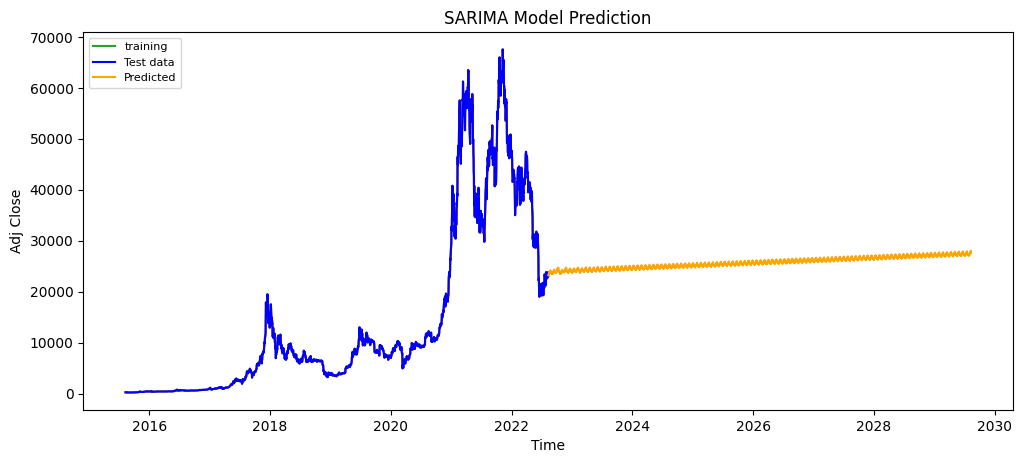

In [ ]:
plt.figure(figsize=(12,5), dpi=100)
#plt.figure(figsize=(12,5))
plt.plot(df.index, df['Adj Close'])
plt.plot(lim_df)

plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Test data')
#plt.plot(predictions, color = 'orange',label='Predicted')
plt.plot(pred, color = 'orange',label='Predicted')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.title('SARIMA Model Prediction')
plt.xlabel('Time')
plt.ylabel('Adj Close')
plt.legend(loc='upper left', fontsize=8)
#plt.legend(fontsize=8)
plt.show()

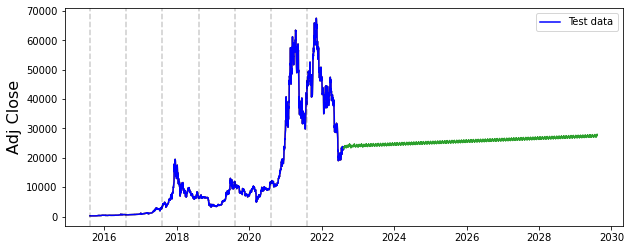

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(df.index, df['Adj Close'])
plt.plot(lim_df)

#plt.plot(lim_df[train_end:]['Adj Close'],'blue',label= 'Test data')
plt.plot(lim_df[train_end:],'blue',label= 'Test data')
#plt.plot(test_data)

#plt.plot(predictions)
plt.plot(pred)
plt.legend(('Date','Predictions'), fontsize=16)

plt.ylabel('Adj Close', fontsize=16)
for year in range(start_date.year, end_date.year):
  plt.axvline(pd.to_datetime(str(year)+'-08-10'), color='k', linestyle='--', alpha=0.2)

plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(test_data, pred)
#mse = mean_squared_error(test_data, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 19829.188366


In [ ]:
mape = np.mean(np.abs(np.array(pred) - np.array(test_data))/np.abs(test_data))
print('MAPE: ' + str(mape))

MAPE: 13.692714583391865
